In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For reproducibility
np.random.seed(1)

Let's set the basic scheme.

In [3]:
_x = np.arange(0, 100, .1)
np.random.shuffle(_x)
_y = _x + 20*np.sin(_x*.1)

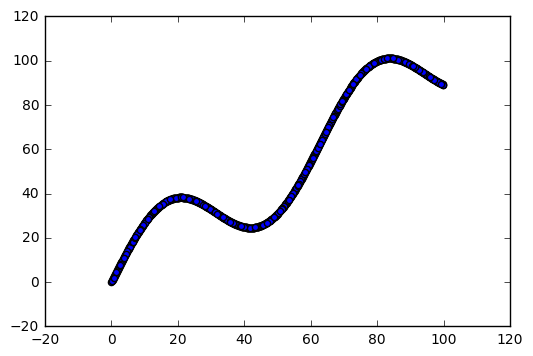

In [4]:
plt.scatter(_x, _y)

In [5]:
_x_train, _x_test = _x[:-100], _x[-100:]
_y_train, _y_test = _y[:-100], _y[-100:]

Graph Building

In [6]:
# Inputs
X_pl = tf.placeholder(tf.float32, [None, 1])
Y_pl = tf.placeholder(tf.float32, [None, 1])

In [7]:
# Variables
W = tf.Variable(tf.random_normal((1, 1000)), name="weight")
b = tf.Variable(tf.zeros((1000,), tf.float32), name="bias")

In [8]:
# fully connected layer (a.k.a. dense layer)
fc1 = tf.matmul(X_pl, W) + b # (None, 10)

# Ouputs
W2 = tf.Variable(tf.random_normal((1000, 1)), name="weight2")
b2 = tf.Variable(0., name="bias2")
preds = tf.matmul(fc1, W2) + b2 # (None, 1)



In [9]:
# Loss
loss = tf.reduce_mean(tf.square(preds - Y_pl)) # L2 loss

In [10]:
# Training scheme
optimizer = tf.train.AdamOptimizer(0.01)
train_op = optimizer.minimize(loss)

Run Session

In [12]:
def get_samples(x, y, size):
    assert len(x) == len(y), "Two arrays must be the same in length!"
    indices = np.random.choice(len(x), size)
    sample1 = x[indices]
    sample2 = y[indices]
    return np.expand_dims(sample1,1), np.expand_dims(sample2, 1)

In [13]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

summary_writer = tf.summary.FileWriter('asset2')
for i in range(1, 3001):
    x_batch, y_batch = get_samples(_x_train, _y_train, 100)
    X = np.expand_dims(_x_train, -1)
    Y = np.expand_dims(_y_train, -1)
    
    sess.run(train_op, {X_pl: X, Y_pl: Y})
    


In [14]:
# Report
## Training data
_preds = sess.run(preds, {X_pl: np.expand_dims(_x_test, -1)})


In [15]:
_preds

array([[ 45.93869781],
       [ 33.36933136],
       [ 68.17557526],
       [ 21.57360077],
       [ 63.05161285],
       [ 96.11734772],
       [ 20.51016998],
       [ 39.94364166],
       [ 42.36118317],
       [ 32.49964142],
       [ 17.7062149 ],
       [ 73.88101959],
       [ 80.64847565],
       [  7.65100002],
       [ 65.0822525 ],
       [ 69.81998444],
       [ 32.78940582],
       [ 92.83219147],
       [ 51.06290436],
       [ 76.87735748],
       [ 41.00711823],
       [  7.94104862],
       [ 24.47418976],
       [ 11.71181583],
       [  6.97417355],
       [ 50.57913971],
       [ 34.23932648],
       [ 90.89713287],
       [ 65.56522369],
       [ 38.00980377],
       [ 84.80619049],
       [  8.03771877],
       [ 62.37509918],
       [  9.68136692],
       [ 53.57602692],
       [ 82.09976959],
       [ 55.31687164],
       [ 97.85953522],
       [ 59.76450348],
       [ 94.18460846],
       [ 49.41916656],
       [ 42.94062042],
       [ 12.38851261],
       [ 57

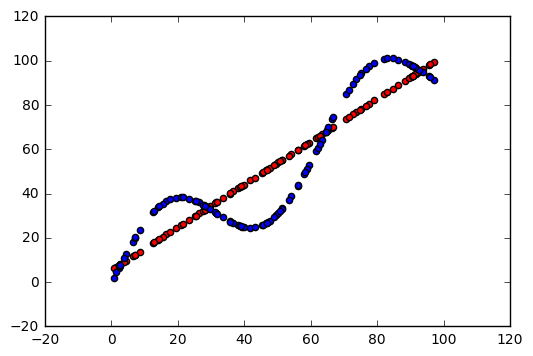

In [16]:
plt.scatter(_x_test, _preds, c="r")
plt.scatter(_x_test, _y_test)
plt.show()